In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\spam.csv",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.rename(columns={'v1':'Target', 'v2':'SMS'}, inplace = True)

In [6]:
df.isnull().sum()

Target    0
SMS       0
dtype: int64

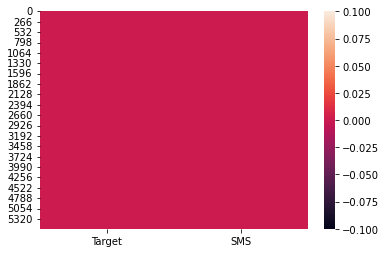

In [7]:
sns.heatmap(df.isnull());

In [8]:
df.isnull().sum().any()

False

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(keep = 'first', inplace =True)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from collections import Counter


In [14]:
df['No_of_characters'] = df['SMS'].apply(len)

In [15]:
df.head()

,Target,SMS,No_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


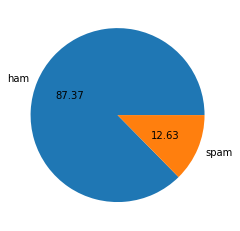

0    4516
1     653
Name: Target, dtype: int64

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()
df['Target'].value_counts()

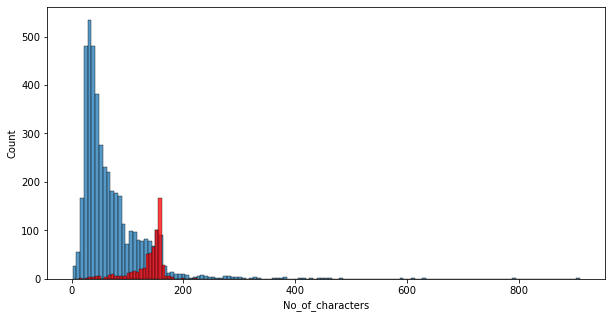

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Target'] == 0]['No_of_characters'])
sns.histplot(df[df['Target'] == 1]['No_of_characters'],color='red')
plt.show()

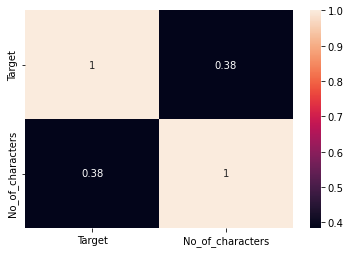

In [18]:
sns.heatmap(df.corr(),annot=True);

In [19]:
from nltk.corpus import stopwords
def clean_text(df, df_column_name):
    
    df[df_column_name] = df[df_column_name].str.lower()

    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [20]:
clean_text(df, 'SMS')
df['SMS'].head()

0    go jurong point crazy available bugis n great ...
1                                ok lar joking wif oni
2    free entry numbr wkly comp win fa cup final tk...
3                      dun say early hor c already say
4               nah think goes usf lives around though
Name: SMS, dtype: object

In [21]:
ham_corpus = []
for i in df[df['Target'] == 0]['SMS'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [22]:
len(ham_corpus)

35163

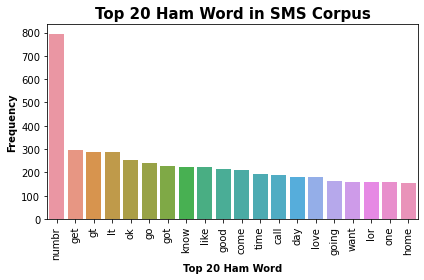

In [23]:
from collections import Counter
count= sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
count.set_xlabel("Top 20 Ham Word", fontsize=10, fontweight = 'bold')
count.set_ylabel("Frequency", fontsize=10, fontweight = 'bold')
plt.title('Top 20 Ham Word in SMS Corpus', fontsize=15, fontweight = 'bold')
plt.xticks(rotation ='vertical')
plt.tight_layout()
plt.show()

In [24]:
spam_corpus = []
for i in df[df['Target'] == 1]['SMS'].tolist():
    for word in i.split():
        spam_corpus.append(word)

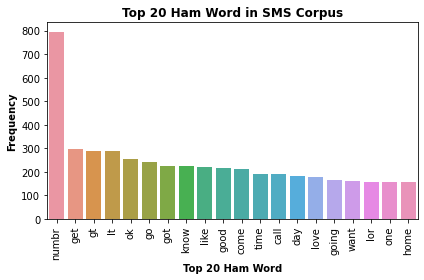

In [25]:
from collections import Counter
count = sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
count.set_xlabel('Top 20 Ham Word',fontsize = 10 ,fontweight = 'bold')
count.set_ylabel('Frequency',fontsize = 10, fontweight = 'bold')
plt.title('Top 20 Ham Word in SMS Corpus', fontsize = 12, fontweight = 'bold')
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)
fertures = tf.fit_transform(df['SMS'])
X=fertures
Y=df[['Target']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.30,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(X_train,Y_train)
    predRF = RF.predict(X_test)
    acc = accuracy_score(Y_test,predRF)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print(f'Best Accuracy is {maxAccu} on Random_state {maxRs}')

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRs)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error

LOR = LogisticRegression()
LOR.fit(X_train,Y_train)

predLOR = LOR.predict(X_test)
print('R2 Score :',r2_score(Y_test,predLOR))

print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test,predLOR))

print('Mean Squared Error',mean_squared_error(Y_test,predLOR))

print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLOR)))

print("-----------------------------------------------------")
print(accuracy_score(Y_test, predLOR))
print("-----------------------------------------------------")
print(confusion_matrix(Y_test, predLOR))
print("-----------------------------------------------------")
print(classification_report(Y_test,predLOR)) 

In [ ]:
cm = confusion_matrix(Y_test,predLOR)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm,annot = True,linewidths=.2,linecolor='black',fmt='.0f',ax=ax,cmap='BuGn',xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix for Logistic Regression');

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

predRFC = RFC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFC))

print('Mean Absolute Error',mean_absolute_error(Y_test,predRFC))

print('Mean Squared Error',mean_squared_error(Y_test,predRFC))

print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFC)))
print("-----------------------------------------------------")
print('Accuracy Score: ',accuracy_score(Y_test, predRFC))
print("-----------------------------------------------------")
print('Confusion Matrix:\n',confusion_matrix(Y_test, predRFC))
print("-----------------------------------------------------")
print(classification_report(Y_test,predRFC))

In [ ]:
cm = confusion_matrix(Y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

predMNB = MNB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predMNB))

print('Mean Absolute Error',mean_absolute_error(Y_test,predMNB))

print('Mean Squared Error',mean_squared_error(Y_test,predMNB))

print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predMNB)))
print("-----------------------------------------------------")
print('Accuracy Score: ',accuracy_score(Y_test, predMNB))
print("-----------------------------------------------------")
print('Confusion Matrix:\n',confusion_matrix(Y_test, predMNB))
print("-----------------------------------------------------")
print(classification_report(Y_test,predMNB))

In [ ]:
cm = confusion_matrix(Y_test,predMNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for MultinomialNB Classifier')
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train,Y_train)

predBNB = BNB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predBNB))

print('Mean Absolute Error',mean_absolute_error(Y_test,predBNB))

print('Mean Squared Error',mean_squared_error(Y_test,predBNB))

print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predBNB)))
print("-----------------------------------------------------")
print('Accuracy Score: ',accuracy_score(Y_test, predBNB))
print("-----------------------------------------------------")
print('Confusion Matrix:\n',confusion_matrix(Y_test, predBNB))
print("-----------------------------------------------------")
print(classification_report(Y_test,predBNB))

In [ ]:
cm = confusion_matrix(Y_test,predBNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for BernoulliNB Classifier')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()
ETC.fit(X_train,Y_train)

predETC = ETC.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETC))

print('Mean Absolute Error',mean_absolute_error(Y_test,predETC))

print('Mean Squared Error',mean_squared_error(Y_test,predETC))

print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETC)))
print("-----------------------------------------------------")
print('Accuracy Score: ',accuracy_score(Y_test, predETC))
print("----------------------------------------------------")

print('Confusion Matrix:\n',confusion_matrix(Y_test, predETC))
print("-----------------------------------------------------")

print(classification_report(Y_test,predETC))

In [ ]:
cm = confusion_matrix(Y_test,predETC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
ADA.fit(X_train,Y_train)

predADA = ADA.predict(X_test)
print('R2 Score:',r2_score(Y_test,predADA))

print('Mean Absolute Error',mean_absolute_error(Y_test,predADA))

print('Mean Squared Error',mean_squared_error(Y_test,predADA))

print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predADA)))
print("-----------------------------------------------------")

print('Accuracy Score: ',accuracy_score(Y_test, predADA))
print("-----------------------------------------------------")

print('Confusion Matrix:\n',confusion_matrix(Y_test, predADA))
print("-----------------------------------------------------")

print(classification_report(Y_test,predADA))

In [ ]:
cm = confusion_matrix(Y_test,predADA)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoostClassifier')
plt.show()

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,Y_train)

predsvc = svc.predict(X_test)
print('R2 Score:',r2_score(Y_test,predsvc))

print('Mean Absolute Error',mean_absolute_error(Y_test,predsvc))

print('Mean Squared Error',mean_squared_error(Y_test,predsvc))

print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predsvc)))
print("----------------------------------------------------")
print('Accuracy Score: ',accuracy_score(Y_test, predsvc))
print("-----------------------------------------------------")
print('Confusion Matrix:\n',confusion_matrix(Y_test, predsvc))
print("-----------------------------------------------------")
print(classification_report(Y_test,predsvc))

In [ ]:
cm = confusion_matrix(Y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

print('Logistic Regression',cross_val_score(LOR,X,Y,cv=5).mean())

print('Random Forest Classifier',cross_val_score(RFC,X,Y,cv=5).mean())

print('BernoulliNB Classifier:',cross_val_score(BNB,X,Y,cv=5).mean())

print('Support Vector  Classifier',cross_val_score(svc,X,Y,cv=5).mean())

print('Extra Trees Classifier:',cross_val_score(ETC,X,Y,cv=5).mean())

print('MultinomialNB Classifier:',cross_val_score(MNB,X,Y,cv=5).mean())

print('AdaBoosting Classifier:',cross_val_score(ADA,X,Y,cv=5).mean())